In [1]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from matplotlib import pyplot as plt
from task1 import *
import numpy as np

from sklearn.neighbors import KNeighborsClassifier

In [2]:
# loading dataset

dataset = datasets.load_iris()
x = dataset.data
y = dataset.target
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.4, random_state=20)

print(x.shape)
print(y.shape)

(150, 4)
(150,)


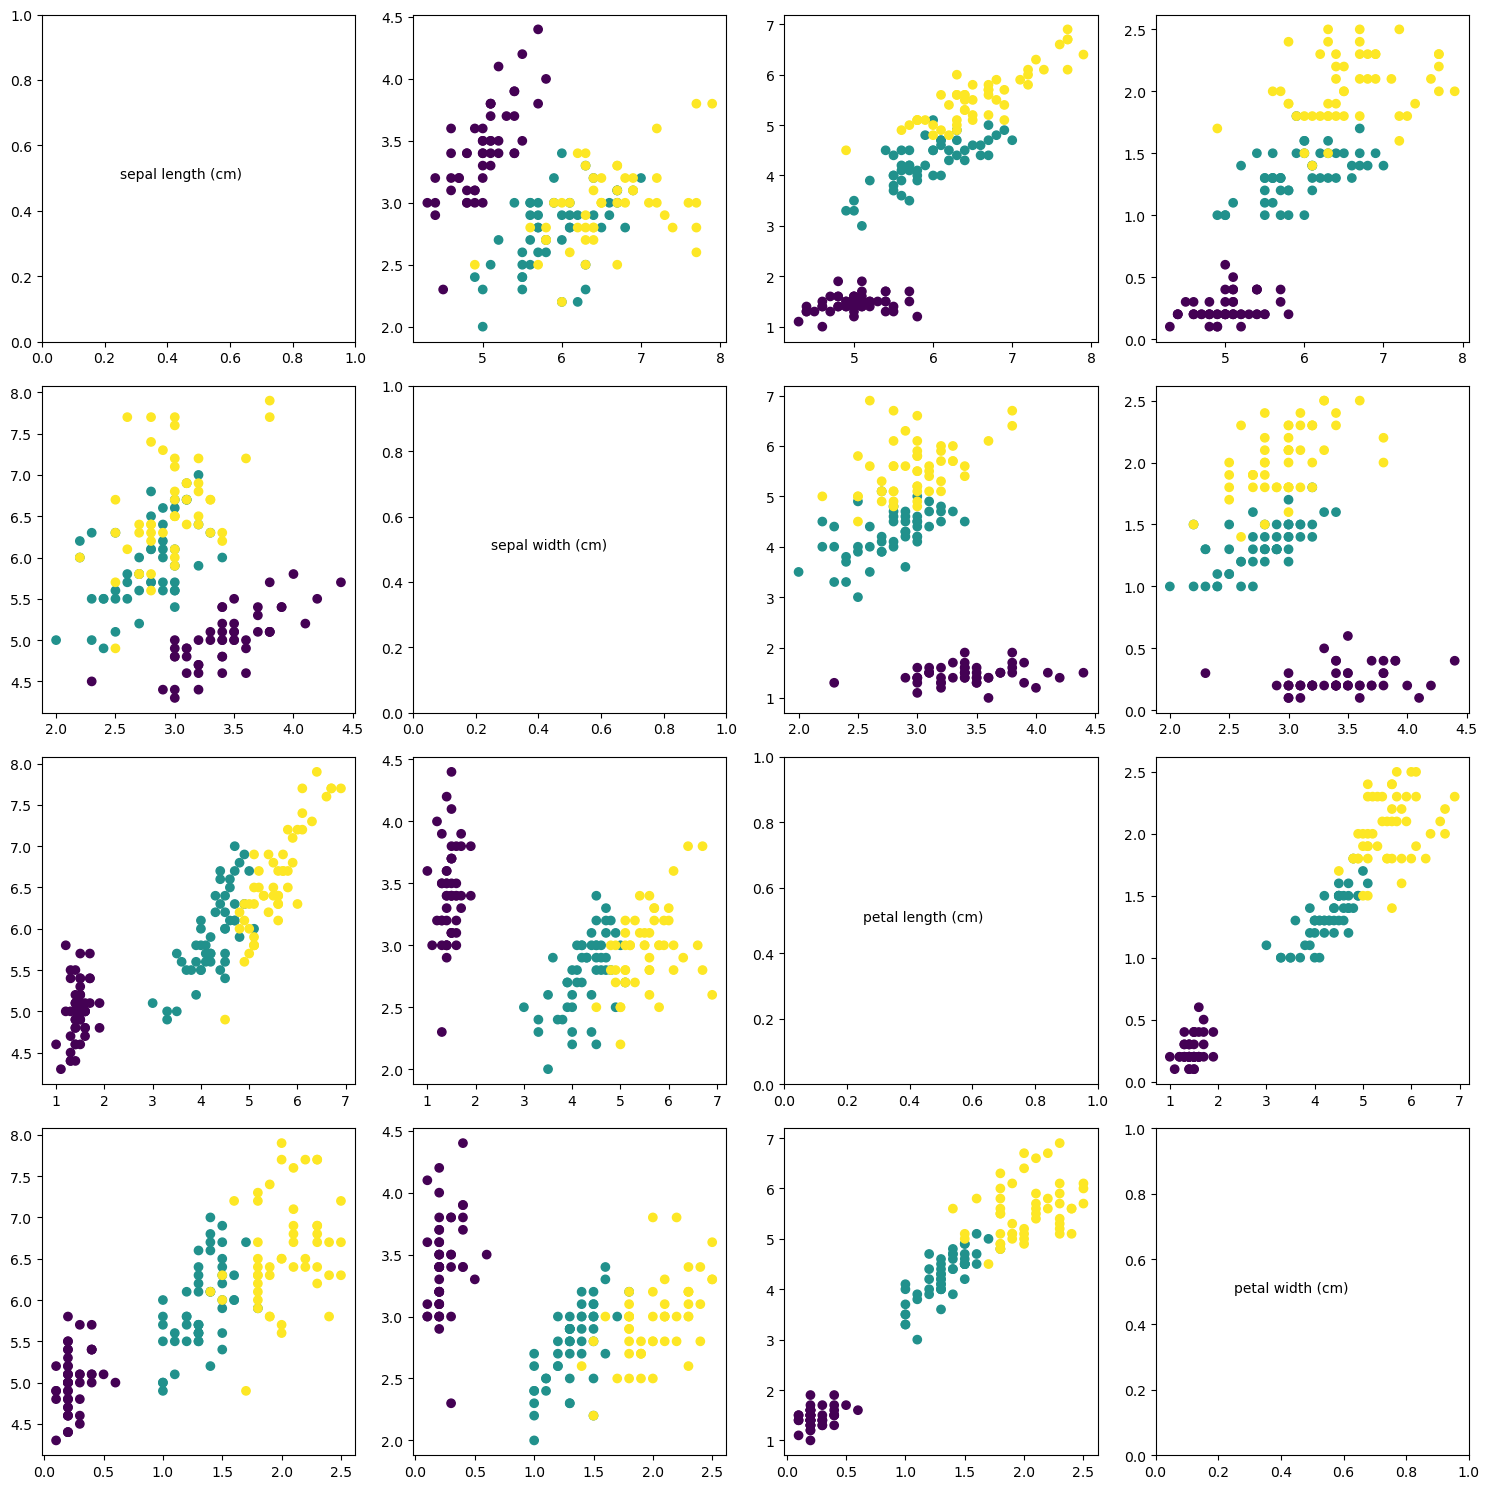

In [3]:
plot_features(x, y, dataset.feature_names)

In [4]:
n_neighbors = 5

model = PotentialFunctionClassifier(n_neighbors)
model.fit(train_x, train_y, 2)

66


In [36]:
test_predicts = model.predict(test_x)

print("Test accuracy: ", metrics.accuracy_score(test_y, test_predicts))
print("Train accuracy: ", metrics.accuracy_score(train_y, model.predict(train_x)))
print("Full dataset: ", metrics.accuracy_score(y, model.predict(x)))

Test accuracy:  0.9666666666666667
Train accuracy:  0.9888888888888889
Full dataset:  0.98


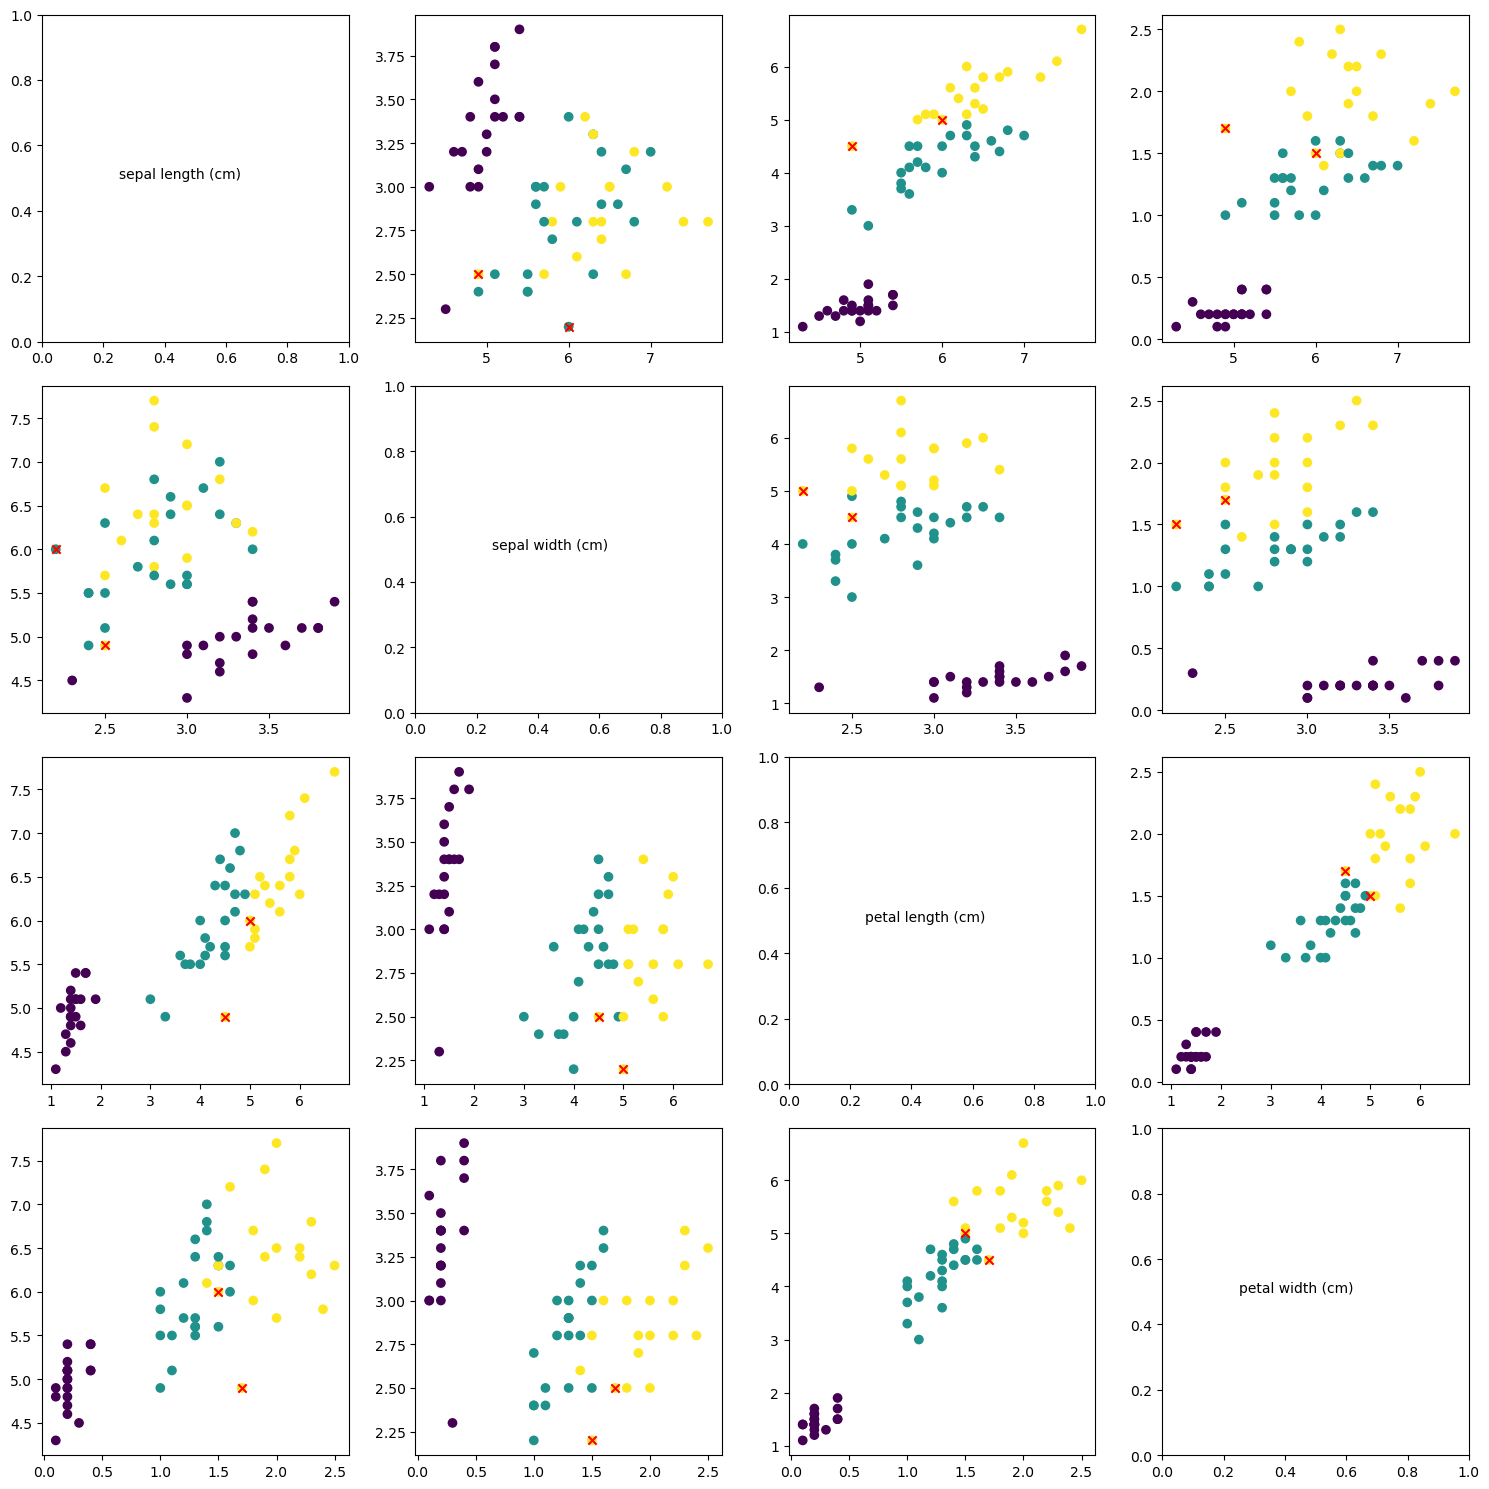

In [37]:
# визуализация правильных/неправильных предиктов
plot_features(test_x, test_y, dataset.feature_names, wrong_predicts(test_predicts, test_y))

In [38]:
# сравнение с skilearn (в KNN передать в weights kernel)
model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=lambda x: 1 / (x + 1))
model.fit(train_x, train_y)
pred = model.predict(test_x)

print("Test accuracy: ", metrics.accuracy_score(test_y, pred))
print("Train accuracy: ", metrics.accuracy_score(train_y, model.predict(train_x)))
print("Full dataset: ", metrics.accuracy_score(y, model.predict(x)))

Test accuracy:  0.9666666666666667
Train accuracy:  0.9777777777777777
Full dataset:  0.9733333333333334


In [39]:
# до обучения

model = PotentialFunctionClassifier(5)
model.train_x = train_x
model.train_y = train_y
model.classes = np.unique(train_y)
model.charges = np.zeros_like(train_y, dtype=int)

test_predicts = model.predict(test_x)

print("Test accuracy: ", metrics.accuracy_score(test_y, test_predicts))
print("Train accuracy: ", metrics.accuracy_score(train_y, model.predict(train_x)))
print("Full dataset: ", metrics.accuracy_score(y, model.predict(x)))

Test accuracy:  0.3333333333333333
Train accuracy:  0.3333333333333333
Full dataset:  0.3333333333333333


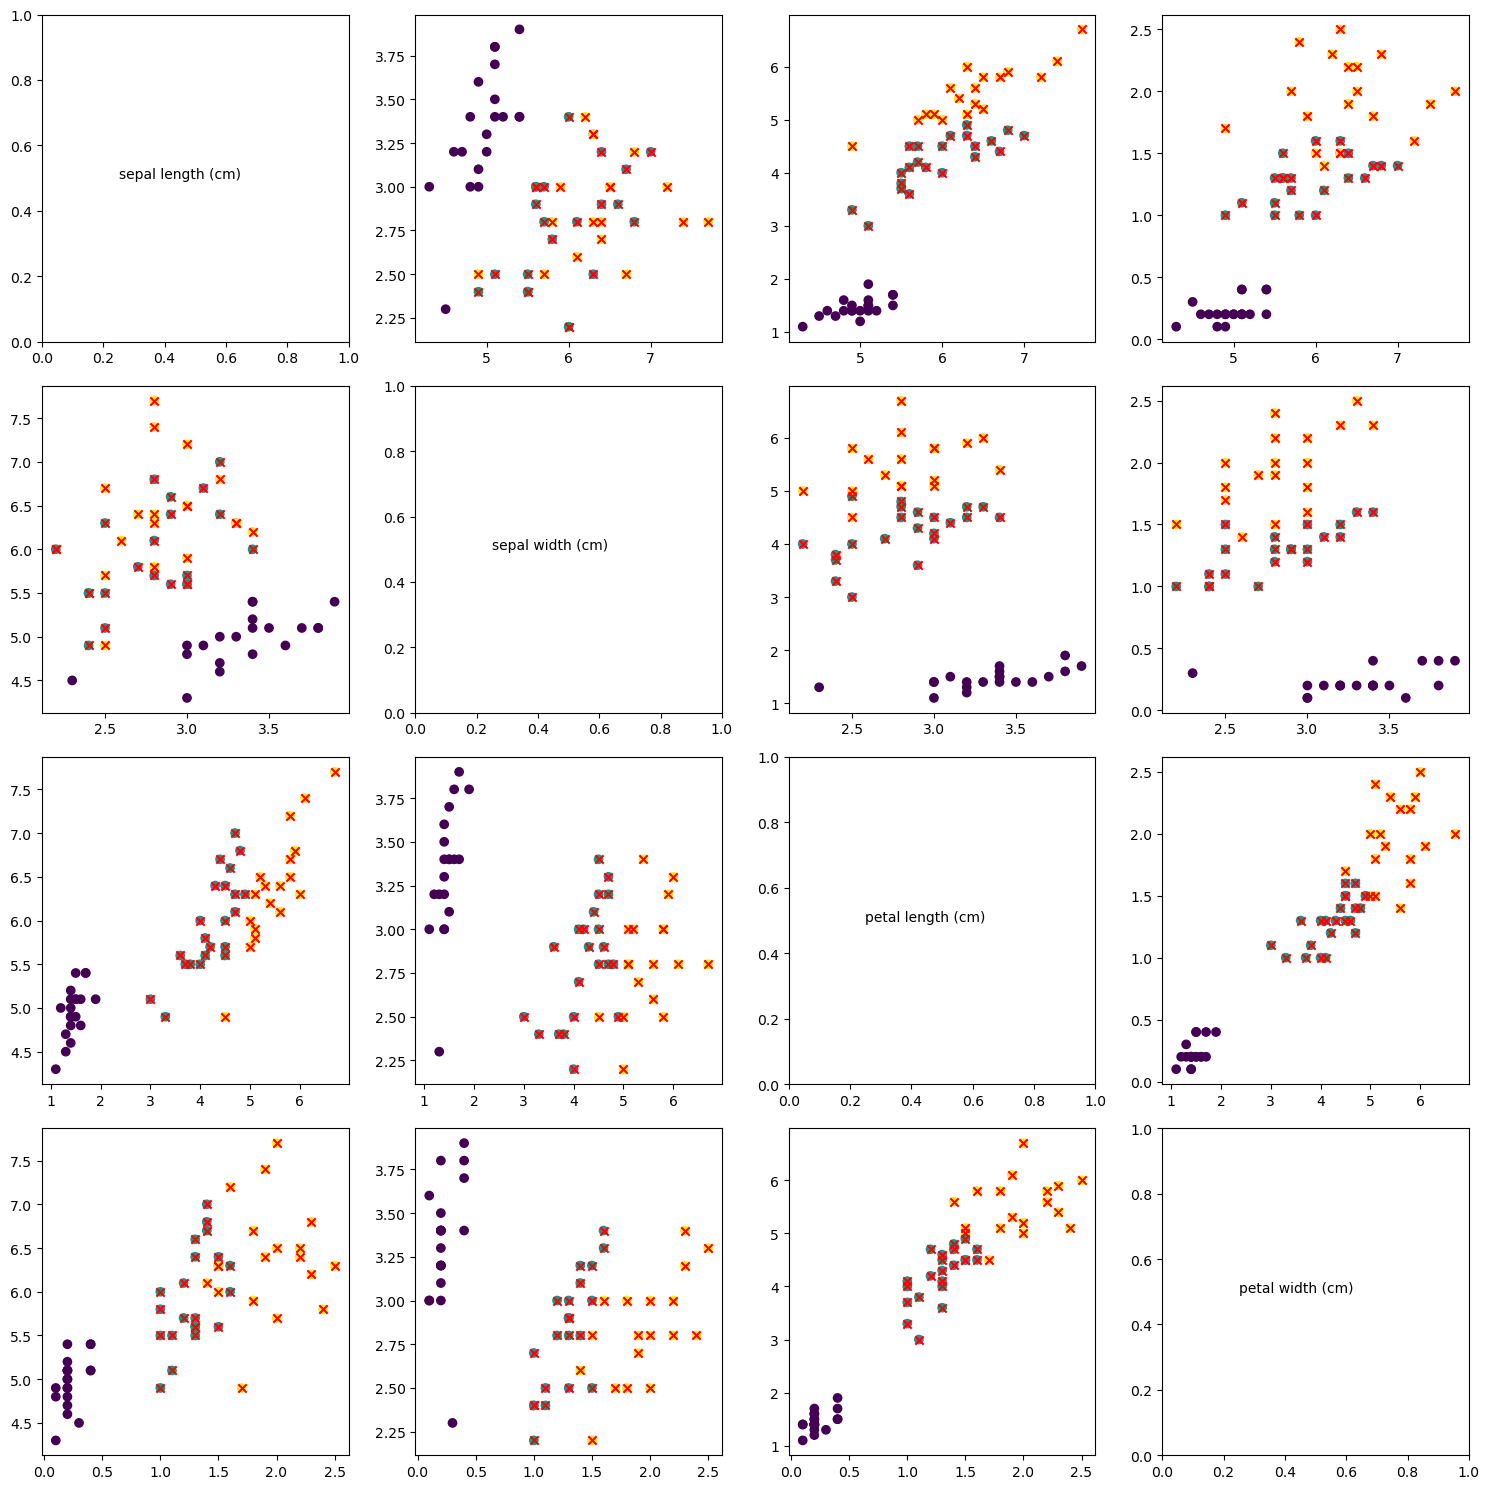

In [40]:
# визуализация правильных/неправильных предиктов
plot_features(test_x, test_y, dataset.feature_names, wrong_predicts(test_predicts, test_y))